This case study using Airfoil Self-Noise dataset.

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

The columns in this dataset are:

A = Frequency
B = Angle of attack
C = Chord length
D = Free-stream velocity
E = Suction side displacement thickness
F = Scaled sound pressure level

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

This is the standard import if you're using "formula notation" (similar to R)

In [2]:
import statsmodels.formula.api as smf

Read data into a DataFrame

In [3]:
data = pd.read_csv('Airfoil-Self-Noise.csv')

This will show all the column names

In [4]:
data.columns

Index([u'A', u'B', u'C', u'D', u'E', u'F'], dtype='object')

Sample Airfoil Self-Noise data (10 rows)

In [5]:
data.head()

,A,B,C,D,E,F
0,800,0,0.3048,71.3,0.002663,126.201
1,1000,0,0.3048,71.3,0.002663,125.201
2,1250,0,0.3048,71.3,0.002663,125.951
3,1600,0,0.3048,71.3,0.002663,127.591
4,2000,0,0.3048,71.3,0.002663,127.461


Prediction variables (attributes)

Frequency, in Hertzs.
Angle of attack, in degrees.
Chord length, in meters.
Free-stream velocity, in meters per second.
Suction side displacement thickness, in meters.
Target variables

Scaled sound pressure level, in decibels.

The shape of the DataFrame.

In [6]:
data.shape

(1503, 6)

Visualize the relationship between the features and the response using scatterplots

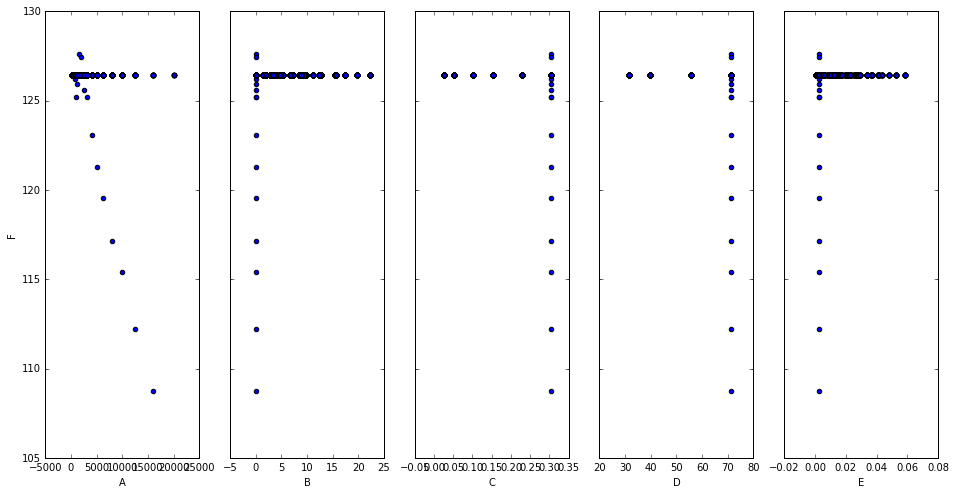

In [7]:
fig, axs = plt.subplots(1, 5, sharey=True)
data.plot(kind='scatter', x='A', y='F', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='B', y='F', ax=axs[1])
data.plot(kind='scatter', x='C', y='F', ax=axs[2])
data.plot(kind='scatter', x='D', y='F', ax=axs[3])
data.plot(kind='scatter', x='E', y='F', ax=axs[4])

Use Statsmodels to estimate the model coefficients for the Airfoil Self-Noise data with B (angle of attack):

Create a fitted model in one line.

In [8]:
lm = smf.ols(formula='F ~ B', data=data).fit()

Show the coefficients.

In [9]:
lm.params

Intercept    126.309388
B              0.008927
dtype: float64

Interpreting Model Coefficients

Interpretation angle of attack coefficient (β1)

A “unit” increase in angle of attack is associated with a 0.008927 “unit” increase in F (scaled sound pressure level).
Using the Model for Prediction

Let’s say that where the Angle of attack increased was 70. What would we predict for the scaled sound pressure level? (First approach for prediction)

126.309388 + (0.008927 * 70) = 126.934278

Thus, we would predict scaled sound pressure level of 126.934278.

Use Statsmodels to make the prediction: (Second approach for prediction).

Create a DataFrame since the Statsmodels formula interface expects it.

In [10]:
X_new = pd.DataFrame({'B': [70]})
X_new.head()

,B
0,70


Plotting the Least Squares Line

Make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [11]:
lm.predict(X_new)

array([ 126.93426352])

Create a DataFrame with the minimum and maximum values of B

In [12]:
X_new = pd.DataFrame({'B': [data.B.min(), data.B.max()]})
X_new.head()

# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 126.30938792,  126.50756275])

Plot the observed data and the least squares line

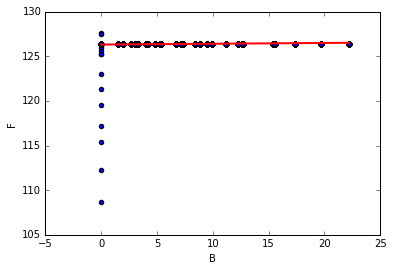

In [13]:
data.plot(kind='scatter', x='B', y='F')
plt.plot(X_new, preds, c='red', linewidth=2)

The confidence intervals for the model coefficients

In [14]:
lm.conf_int()

,0,1
Intercept,126.253015,126.365761
B,0.002663,0.015190


P-values for the model coefficients

In [15]:
lm.pvalues

Intercept    0.000000
B            0.005247
dtype: float64